# **Descrição do Projeto INOVAGRÃO - Software**
## Descrição do Sistema:
Para atender a necessidade de eficiência energética da torra de grãos de café de alta qualidade da região de Bom Jesus do Itabapoana e seu entorno, o Sistema deverá oferecer um suporte para a escolha de curvas de torra através do software "Artisan" (https://artisan-scope.org/).

## Objetivos do Sistema:
* Ser capaz de ler todos os lotes de torras fornecidos pelo "Artisan", extraindo as características de "temperatura dos grãos" e "tempo de torra";
* Além das informações fundamentais acima, o sitema deverá recolher dados do ambiente de torra e características específicas dos grãos, afim de detectar padrões que levem à sugestões de curvas específicas para cada caso;
* Para auxiliar a tomada de decisão, o sistema deve exportar a curva de torra no formato característico do "Artisan", permitindo ao operador importar os dados como uma refência a ser acompanhada na própria interface do "Artisan" durante a execução da torra.

## Requisitos do Sistema: Etapa 1
Para atender as características descritas acima, optou-se pelo teste de ferramentas de "Ciência de Dados" pela metodologia de prototipação afim de testar o sistema de suporte à decisão. As seguintes ferramentas foram selecionadas para testes: 
* **Carga e Manipulação da Base de Dados:**
  * Python;
  * Pandas;
  * Numpy;
* **Reconhecimento de Padrões e Inteligência Artifical:**
  * TensorFlow;
  * Keras;


In [49]:
# Utilizar o pandas 1.3.0 ou superior.



---



# Análise Dados de Torra - Projeto Inovagrão
## Organização da Base de Dados:
Para abrigar os diversos arquivos correspondentes a torra de lotes, os dados foram agrupados em diretórios distintos por categorias de grãos e referenciados por um arquivo índice que armazena informações complementares aos ambiente de torra.

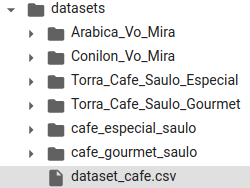


### Parte 1 - Aquisição dos Dados

In [50]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15,15))

In [51]:
# ** Carregando a base de dados **
# O Arquivo "dataset_cafe.csv" contém as referências à todos os arquivos ".alog"
# que representam os "batches" de torra gerados pelo "Artisan". Além disso algumas
# informações como a temperatura do ambiente e a unidade, também estão gravados
# nesta base.

# Carregando o arquivo "dataset_cafe.csv"
dataset_referencia = pd.read_csv('../datasets/dataset_cafe.csv', sep=';')


### Exibição do Arquivo de referência


In [52]:
dataset_referencia.head()

,grao,temp_amb,umid_amb,batch,arquivo
0,cafe_saulo_especial,30.7,0.61,10,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...
1,cafe_saulo_especial,30.5,0.62,20,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...
2,cafe_saulo_especial,30.5,0.32,30,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...
3,cafe_saulo_especial,29.9,0.64,40,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...
4,cafe_saulo_especial,30.2,0.63,50,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...


In [53]:
dataset_referencia.shape

(48, 5)

### Parte 1.2 - Captura dos lotes de torra referenciados no arquivo acima:

In [54]:
# Carregando todos os arquivos "alog" referenciados em "dataset"
# Carregando a Base de dados
# Carregando os arquivos "alog"
index = 0
dataset_torra = pd.DataFrame()
serie_arquivos = dataset_referencia['arquivo']
for arq in serie_arquivos:
  # Lendo a base de dados de cada arquivo de torra
  arq_torra = open(arq)
  arq_torra = eval(arq_torra.read())
  arq_torra = pd.DataFrame.from_dict(arq_torra, orient='index')
  arq_torra = arq_torra.transpose()
  arq_torra.index=[index]
  index = index + 1
  dataset_torra = pd.concat([dataset_torra, arq_torra])


In [55]:
# "dataset_torra", contém todos batches de torra contatenados e indexados da 
# mesma forma que o "dataset_referencia"
dataset_torra.head()

,version,revision,build,artisan_os,artisan_os_version,mode,viewerMode,timeindex,flavors,flavorlabels,...,svRamps,svSoaks,svActions,svBeeps,svDescriptions,devices,elevation,computed,anno_positions,flag_positions
0,2.4.4,1fb3d349,0,Windows,10,C,False,"[29, 179, 279, 0, 0, 0, 313, 0]","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","[Acidez, Sensa\xe7\xe3o, X\xedcara limpa, Impa...",...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 274.4, 'CHARGE_BT': 215.2, 'TP_i...","[[0, 58.6455796500004, 240.23087252643805, 58....",[]
1,2.4.4,1fb3d349,0,Windows,10,C,False,"[5, 144, 229, 0, 0, 0, 270, 0]","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","[Acidez, Sensa\xe7\xe3o, X\xedcara limpa, Impa...",...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 268.4, 'CHARGE_BT': 216.3, 'TP_i...","[[0, 10.28913515000022, 241.3451901009379, 10....",[]
2,2.4.4,1fb3d349,0,Windows,10,C,False,"[4, 141, 231, 0, 0, 0, 267, 0]","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","[Acidez, Sensa\xe7\xe3o, X\xedcara limpa, Impa...",...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 267.5, 'CHARGE_BT': 217.6, 'TP_i...","[[0, 10.108973650001644, 242.62174463855496, 1...",[]
3,2.4.4,1fb3d349,0,Windows,10,C,False,"[5, 141, 222, 0, 0, 0, 260, 0]","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","[Acidez, Sensa\xe7\xe3o, X\xedcara limpa, Impa...",...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 278.7, 'CHARGE_BT': 224.5, 'TP_i...","[[0, 11.226503150001008, 249.50075915608238, 1...",[]
4,2.4.4,1fb3d349,0,Windows,10,C,False,"[6, 144, 233, 0, 0, 0, 271, 0]","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","[Acidez, Sensa\xe7\xe3o, X\xedcara limpa, Impa...",...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 255.1, 'CHARGE_BT': 216.5, 'TP_i...","[[0, 12.77746500000012, 241.4894726938152, 12....",[]


In [56]:
# Concatenando as bases em um único dataset
dataset_completo = pd.concat([dataset_referencia, dataset_torra], axis=1)

### Exibição dos dados Concatenados:

In [57]:
# "dataset_completo" representa todos os dados de torra agrupados
dataset_completo.head(3)

,grao,temp_amb,umid_amb,batch,arquivo,version,revision,build,artisan_os,artisan_os_version,...,svRamps,svSoaks,svActions,svBeeps,svDescriptions,devices,elevation,computed,anno_positions,flag_positions
0,cafe_saulo_especial,30.7,0.61,10,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...,2.4.4,1fb3d349,0,Windows,10,...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 274.4, 'CHARGE_BT': 215.2, 'TP_i...","[[0, 58.6455796500004, 240.23087252643805, 58....",[]
1,cafe_saulo_especial,30.5,0.62,20,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...,2.4.4,1fb3d349,0,Windows,10,...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 268.4, 'CHARGE_BT': 216.3, 'TP_i...","[[0, 10.28913515000022, 241.3451901009379, 10....",[]
2,cafe_saulo_especial,30.5,0.32,30,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...,2.4.4,1fb3d349,0,Windows,10,...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[-1, -1, -1, -1, -1, -1, -1, -1]","[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 267.5, 'CHARGE_BT': 217.6, 'TP_i...","[[0, 10.108973650001644, 242.62174463855496, 1...",[]




---



### Parte 2 - Depuração dos dados de torra
Para a análise dos dados, optou-se por utilizar apenas os valores de Temperatura e Tempo de Torra no interválo útil, ou seja: 
* Após a carga dos grãos e
* Antes da retirada dos grão do cilíndro de torra

Para isso, duas novas colunas forma adicionadas ao "dataset_completo", contendo os valores de temperatura e tempo modificados com a remoção dos valores ditos acima: "temp2_modificado", "timex_modificado", "charge_bt_modificado"

In [58]:
# Para a análise dos dados, optou-se por utilizar apenas os valores de Temperatura
# e Tempo de Torra no interválo útil, ou seja: 
# - Após a carga dos grãos e
# - Antes da retirada dos grão do cilíndro de torra
# Para isso, duas novas colunas forma adicionadas ao "dataset_completo", contendo
# os valores de temperatura e tempo modificados com a remoção dos valores ditos
# acima: "temp2_modificado", "timex_modificado", "charge_bt_modificado"

dataframe_batches = pd.DataFrame()

for torra_batch in dataset_completo.index.to_list():

  # ** Retirando os dados da Torra - timex e temp2 **
  timex = dataset_completo['timex'][torra_batch]
  temp2 = dataset_completo['temp2'][torra_batch]
  dic = {'timex':timex,
         'temp2':temp2}
  # Montando o DataFrame
  df = pd.DataFrame(data=dic)

  # ** Selecionando os dados antes da retirada dos grãos **
  drop_time = dataset_completo['computed'][torra_batch]['DROP_time']
  df = df[df['timex'] < drop_time]

  # ** Retirando os valores antes da carga dos grãos **
  # Primeiro obtemos o maior valor antes do TP
  tp_idx = dataset_completo['computed'][torra_batch]['TP_idx']
  df2 = df[df.index < tp_idx]
  charge_bt = max(df2['temp2'])
  # Agora pegamos a sua posição no dataset
  charge_bt_idx = df2[df2['temp2']==charge_bt].index[0]
  df = df[df.index >= charge_bt_idx]

  # ** Removendo erros de Leitura da Amostra - Outliers **
  df = df[df['temp2'] > 30.0] # Temperaturas abaixo da Temperatura do Ambiente 
                              # não serão consideradas

  # Concatenando para um novo DataFrame
  df2=pd.DataFrame({'timex_modificado': [df['timex'].values],
                    'temp2_modificado': [df['temp2'].values],
                    'charge_bt_modificado': charge_bt}, index=[torra_batch])
  dataframe_batches = pd.concat([dataframe_batches, df2])

dataset_completo = pd.concat([dataset_completo, dataframe_batches], axis=1)

dataset_completo.head(2)

,grao,temp_amb,umid_amb,batch,arquivo,version,revision,build,artisan_os,artisan_os_version,...,svBeeps,svDescriptions,devices,elevation,computed,anno_positions,flag_positions,timex_modificado,temp2_modificado,charge_bt_modificado
0,cafe_saulo_especial,30.7,0.61,10,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...,2.4.4,1fb3d349,0,Windows,10,...,"[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 274.4, 'CHARGE_BT': 215.2, 'TP_i...","[[0, 58.6455796500004, 240.23087252643805, 58....",[],"[58.64557965, 60.6460114, 62.6463319, 64.65060...","[215.23087253, 213.67806666, 199.98285238, 185...",215.230873
1,cafe_saulo_especial,30.5,0.62,20,../datasets/Torra_Cafe_Saulo_Especial/Torra Ba...,2.4.4,1fb3d349,0,Windows,10,...,"[False, False, False, False, False, False, Fal...","[, , , , , , , ]","[Phidget 1048 4xTC 01, +MODBUS 34, +MODBUS 56]",0,"{'CHARGE_ET': 268.4, 'CHARGE_BT': 216.3, 'TP_i...","[[0, 10.28913515000022, 241.3451901009379, 10....",[],"[10.28913515, 12.289439, 14.2888408, 16.291551...","[216.3451901, 216.12302283, 205.53899633, 189....",216.345190


### Visualização da "poda" de Dados:

Text(0, 0.5, 'Temperatura')

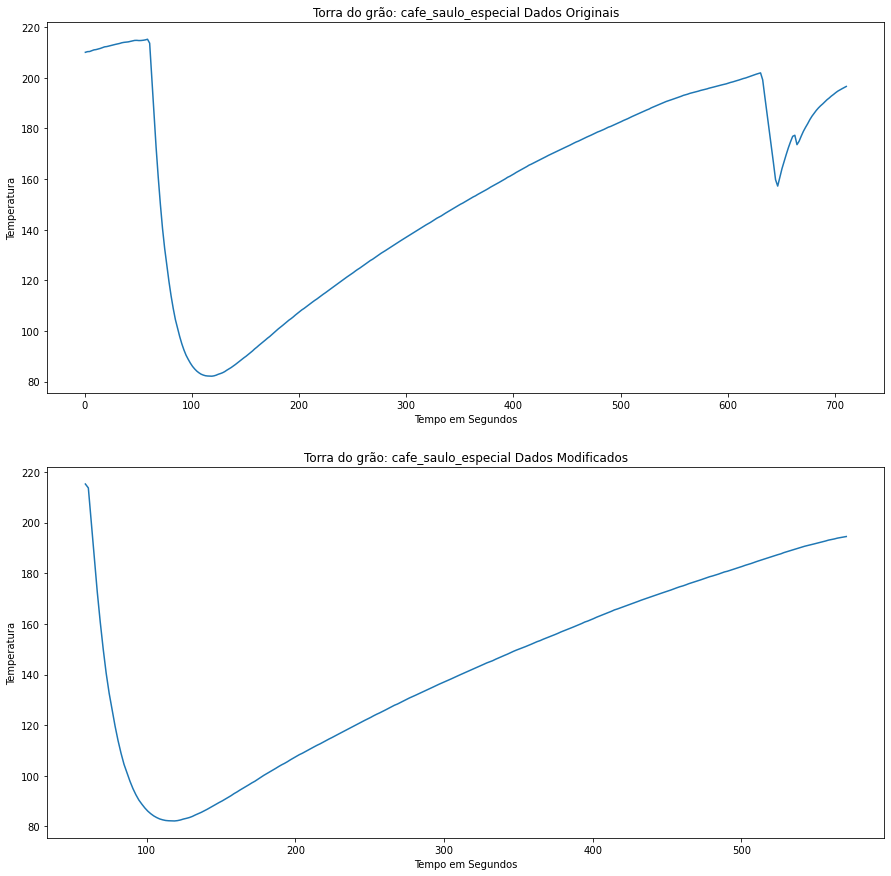

In [59]:
# O gráfico abaixo representa graficamente o tratamento realizado nos valores de 
# um lote (lote 0), demonstrnado antes e depois da retirada dos dados

# Preparando os gráficos
grafico = plt.figure()
g1 = grafico.add_subplot(2,1,1)
g2 = grafico.add_subplot(2,1,2)

torra_batch = 0 # Exemplo de um batch
grao  = dataset_completo['grao'][torra_batch]
timex = dataset_completo['timex'][torra_batch]
temp2 = dataset_completo['temp2'][torra_batch]
g1.plot(timex, temp2)
g1.set_title("Torra do grão: "+grao+" Dados Originais")
g1.set_xlabel("Tempo em Segundos")
g1.set_ylabel("Temperatura")

timex = dataset_completo['timex_modificado'][torra_batch]
temp2 = dataset_completo['temp2_modificado'][torra_batch]
g2.plot(timex, temp2)
g2.set_title("Torra do grão: "+grao+" Dados Modificados")
g2.set_xlabel("Tempo em Segundos")
g2.set_ylabel("Temperatura")




---



### Estatísticas Básicas

In [60]:
# Como a curva de Torra é o objetivo central da análise, foi selecionado uma base
# de dados com um recorte dos valores necessários:
dic_util = {'grao' : dataset_completo['grao'],
             'temp_amb': dataset_completo['temp_amb'],
             'umid_amb': dataset_completo['umid_amb'],
             'peso' : dataset_completo['weight'],
             'timex' : dataset_completo['timex_modificado'],
             'temp2' : dataset_completo['temp2_modificado'],
             'charge_bt_modificado': dataset_completo['charge_bt_modificado']
            }
dataset_util = pd.DataFrame(dic_util)
#dataset_util.rename_axis('batch', axis=1, inplace=True)
dataset_util.head()

,grao,temp_amb,umid_amb,peso,timex,temp2,charge_bt_modificado
0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]","[58.64557965, 60.6460114, 62.6463319, 64.65060...","[215.23087253, 213.67806666, 199.98285238, 185...",215.230873
1,cafe_saulo_especial,30.5,0.62,"[2000.0, 1717.0, g]","[10.28913515, 12.289439, 14.2888408, 16.291551...","[216.3451901, 216.12302283, 205.53899633, 189....",216.345190
2,cafe_saulo_especial,30.5,0.32,"[2000.0, 1802.0, g]","[10.10897365, 12.1090243, 14.10863075, 18.1082...","[217.62174464, 209.45991099, 193.96918907, 166...",217.621745
3,cafe_saulo_especial,29.9,0.64,"[2000.0, 1721.0, g]","[11.22650315, 13.2273254, 15.2275412, 19.22658...","[224.50075916, 217.81612379, 201.67097142, 173...",224.500759
4,cafe_saulo_especial,30.2,0.63,"[2000.0, 1723.0, g]","[12.777465, 14.77756455, 16.77775905, 18.77943...","[216.48947269, 215.73837593, 203.71064578, 188...",216.489473


In [61]:
# "Explodindo" os valores de torra "timex" e "temp2" (Pandas 1.3.0)
dataset_util = dataset_util.explode(column=['timex', 'temp2'])
dataset_util.head()

,grao,temp_amb,umid_amb,peso,timex,temp2,charge_bt_modificado
0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",58.64558,215.230873,215.230873
0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",60.646011,213.678067,215.230873
0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",62.646332,199.982852,215.230873
0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",64.650602,185.970144,215.230873
0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",66.646807,172.630521,215.230873


In [62]:
#recriando o índice de pesquisa
dataset_util.reset_index(inplace=True)
dataset_util.columns=['batch', 'grao', 'temp_amb', 'umid_amb', 
                      'peso', 'timex', 'temp2', 'charge_bt_modificado']
dataset_util.head()

,batch,grao,temp_amb,umid_amb,peso,timex,temp2,charge_bt_modificado
0,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",58.64558,215.230873,215.230873
1,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",60.646011,213.678067,215.230873
2,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",62.646332,199.982852,215.230873
3,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",64.650602,185.970144,215.230873
4,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",66.646807,172.630521,215.230873


In [63]:
# Adicionando a Massa de Grãos ao "dataset_util"
x = np.array(dataset_util['peso'].to_list())[:,0].astype(float).astype(int)
dataset_util['massa_grao'] = x
dataset_util

,batch,grao,temp_amb,umid_amb,peso,timex,temp2,charge_bt_modificado,massa_grao
0,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",58.64558,215.230873,215.230873,2000
1,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",60.646011,213.678067,215.230873,2000
2,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",62.646332,199.982852,215.230873,2000
3,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",64.650602,185.970144,215.230873,2000
4,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",66.646807,172.630521,215.230873,2000
...,...,...,...,...,...,...,...,...,...
12675,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",548.908025,196.340843,186.634894,600
12676,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",550.908707,196.536785,186.634894,600
12677,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",552.908391,196.763094,186.634894,600
12678,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",554.908076,197.011429,186.634894,600




---



### Análise de Frequências por Tipos de Grãos

In [64]:
# Frequência dos dados por tipo de grãos
frequencia_grao = dataset_util['grao'].value_counts()
percentual_grao = dataset_util['grao'].value_counts(normalize = True)*100
dic_util={'Frequência': frequencia_grao,
          'Percentual %': percentual_grao.round(1)}
df = pd.DataFrame(dic_util)
df.rename_axis('Grão', axis=1, inplace=True)
df

Grão,Frequência,Percentual %
cafe_saulo_gourmet,3169,25.0
cafe_do_mario,2865,22.6
cafe_saulo_especial,2831,22.3
vo_mira_conilon,2114,16.7
vo_mira_arabica,1701,13.4


Text(0.5, 1.0, 'Percentual por Grão da Amostra')

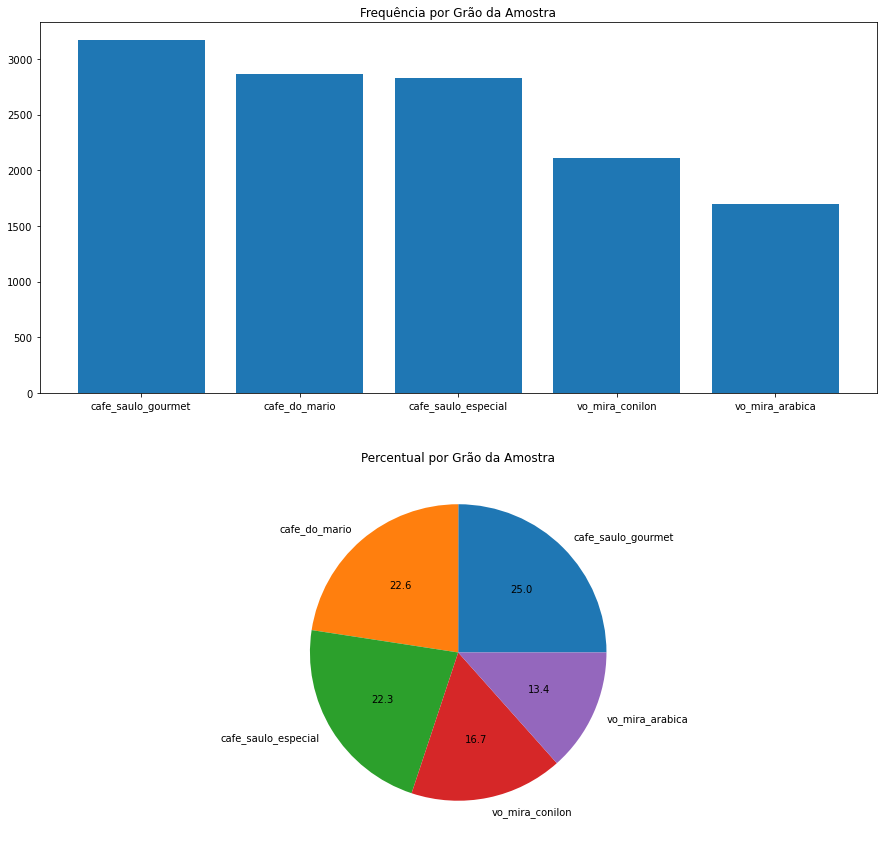

In [65]:
# Visualizando a Frequência por tipo de grãos
# Preparando os gráficos
grafico = plt.figure()
g1 = grafico.add_subplot(2,1,1)
g2 = grafico.add_subplot(2,1,2)

g1.bar(df.index.values, df['Frequência'])
g1.set_title("Frequência por Grão da Amostra")

g2.pie(df['Frequência'],labels=df.index.values, autopct='%.1f',)
g2.set_title("Percentual por Grão da Amostra")



---



### Análise da Temperatura do Ambiente

Text(0.5, 0, 'Temp. ºC')

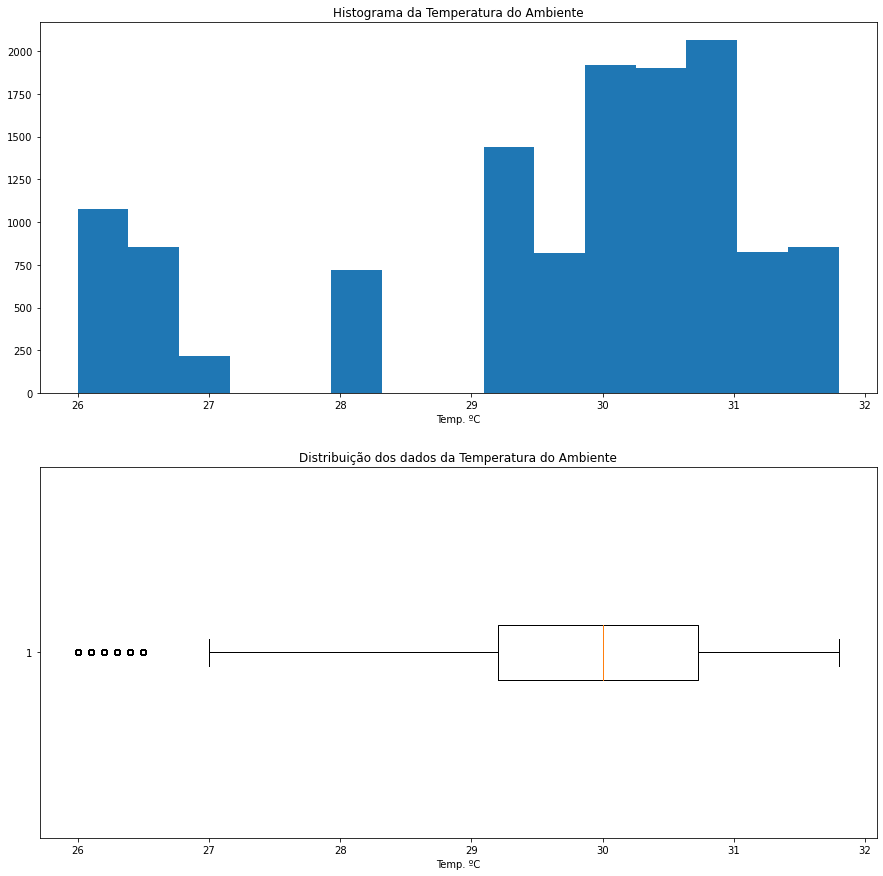

In [66]:
# Preparando os gráficos
grafico = plt.figure()
g1 = grafico.add_subplot(2,1,1)
g2 = grafico.add_subplot(2,1,2)

# Frequência dos Valores de Temperatura do Ambiente de Torra
# Histograma da Temperatura do Ambiente na Amostra
g1.hist(dataset_util['temp_amb'], bins=15)
g1.set_title('Histograma da Temperatura do Ambiente')
g1.set_xlabel('Temp. ºC')

# Distribuição Frequência dos Valores de Temperatura do Ambiente de Torra
# BoxPlot da Temperatura do Ambiente na Amostra
g2.boxplot(dataset_util['temp_amb'], vert=False)
g2.set_title('Distribuição dos dados da Temperatura do Ambiente')
g2.set_xlabel('Temp. ºC')

In [67]:
# Valores Centrais da Temperatura do Ambiente da Amostra
print('Valores Centrais da Temperatura do Ambiente da Amostra')
print("MODA = %.2f, MEDIANA = %.2f, MÉDIA = %.2f" 
      % (dataset_util['temp_amb'].mode()[0], 
         dataset_util['temp_amb'].median(), 
         dataset_util['temp_amb'].mean()))

Valores Centrais da Temperatura do Ambiente da Amostra
MODA = 29.90, MEDIANA = 30.00, MÉDIA = 29.57


In [68]:
# Dispersão da Amostra
print('Desvio Padrão: %.2f' % dataset_util['temp_amb'].std())

Desvio Padrão: 1.68




---



### Análise da Umidade do Ambiente



Text(0.5, 0, 'Umidade %')

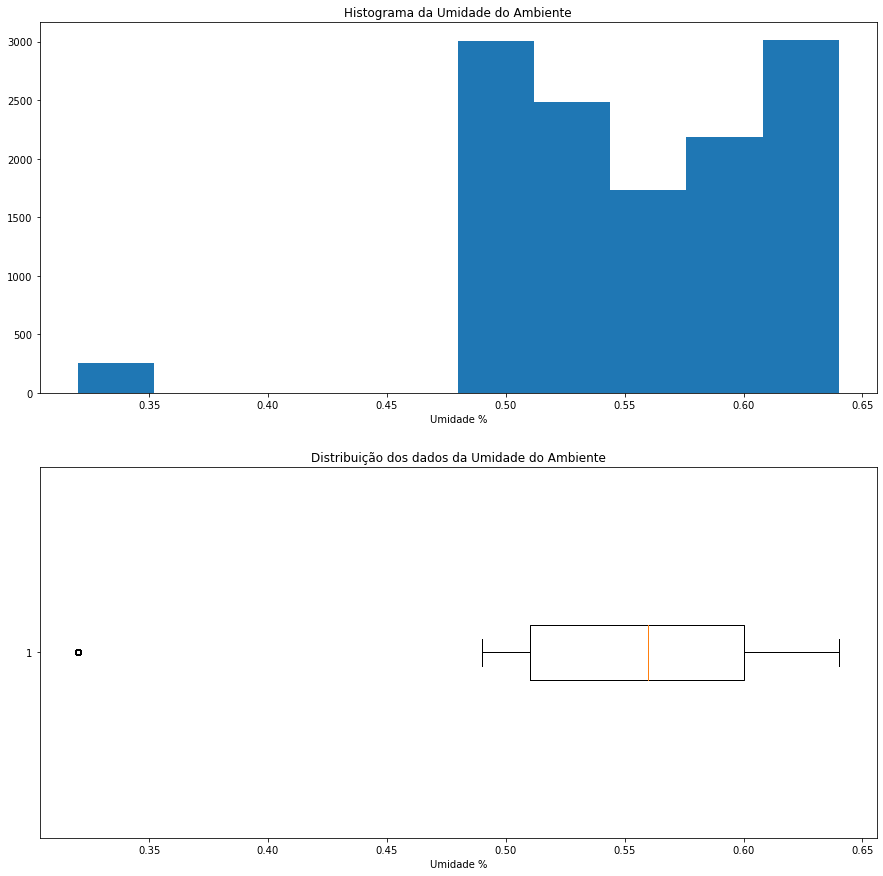

In [69]:
# Preparando os gráficos
grafico = plt.figure()
g1 = grafico.add_subplot(2,1,1)
g2 = grafico.add_subplot(2,1,2)

# Frequência dos Valores de Umidade do Ambiente de Torra
# Histograma da Umidade do Ambiente na Amostra
g1.hist(dataset_util['umid_amb'])
g1.set_title('Histograma da Umidade do Ambiente')
g1.set_xlabel('Umidade %')

# Distribuição Frequência dos Valores de Temperatura do Ambiente de Torra
# BoxPlot da Temperatura do Ambiente na Amostra
g2.boxplot(dataset_util['umid_amb'], vert=False)
g2.set_title('Distribuição dos dados da Umidade do Ambiente')
g2.set_xlabel('Umidade %')

In [70]:
# Valores Centrais da Umidade do Ambiente da Amostra
print('Valores Centrais da Umidade do Ambiente da Amostra')
print("MODA = %.2f, MEDIANA = %.2f, MÉDIA = %.2f" 
      % (dataset_util['umid_amb'].mode()[0], 
         dataset_util['umid_amb'].median(), 
         dataset_util['umid_amb'].mean()))

Valores Centrais da Umidade do Ambiente da Amostra
MODA = 0.64, MEDIANA = 0.56, MÉDIA = 0.56


In [71]:
# Dispersão da Amostra
print('Desvio Padrão: %.2f' % dataset_util['umid_amb'].std())

Desvio Padrão: 0.06




---



### Análise da Massa de Grãos


Text(0.5, 0, 'gramas')

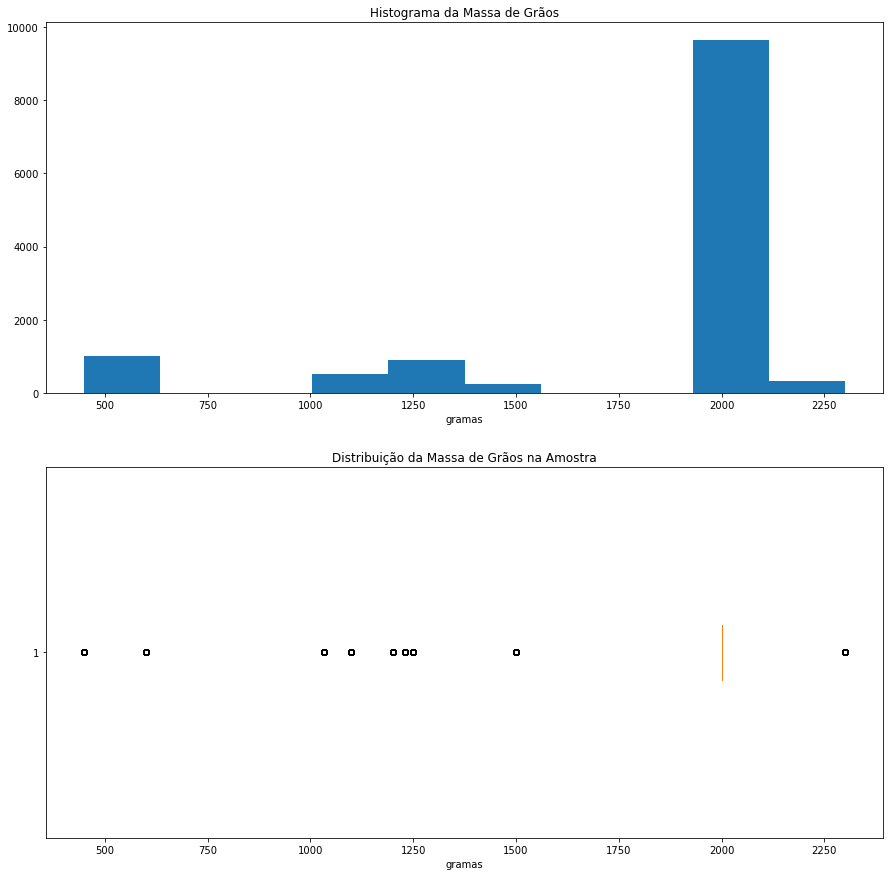

In [72]:
# Preparando os gráficos
grafico = plt.figure()
g1 = grafico.add_subplot(2,1,1)
g2 = grafico.add_subplot(2,1,2)

# Frequência da Massa de Grãos de Torra
# Histograma da Massade Grãos na Amostra
g1.hist(dataset_util['massa_grao'])
g1.set_title('Histograma da Massa de Grãos')
g1.set_xlabel('gramas')

# Distribuição Frequência dos Valores de Temperatura do Ambiente de Torra
# BoxPlot da Temperatura do Ambiente na Amostra
g2.boxplot(dataset_util['massa_grao'], vert=False)
g2.set_title('Distribuição da Massa de Grãos na Amostra')
g2.set_xlabel('gramas')

In [73]:
# Valores Centrais da Massa de Grãos da Amostra
print('Valores Centrais da Massa de Grãos da Amostra')
print("MODA = %.2f, MEDIANA = %.2f, MÉDIA = %.2f" 
      % (dataset_util['massa_grao'].mode()[0], 
         dataset_util['massa_grao'].median(), 
         dataset_util['massa_grao'].mean()))

Valores Centrais da Massa de Grãos da Amostra
MODA = 2000.00, MEDIANA = 2000.00, MÉDIA = 1787.05


In [74]:
# Dispersão da Amostra
print('Desvio Padrão: %.2f' % dataset_util['massa_grao'].std())

Desvio Padrão: 458.64




---



## Corrigindo a Base de Dados

In [75]:
# Corrigindo os dados de Umidade do Ambiente
# O Valor Outlier de umidade será subtituído pela média
idx = dataset_util[dataset_util['umid_amb']== 0.32].index.to_list()
dataset_util.loc[idx, 'umid_amb'] = dataset_util['umid_amb'].mean()

Text(0.5, 0, 'Umidade %')

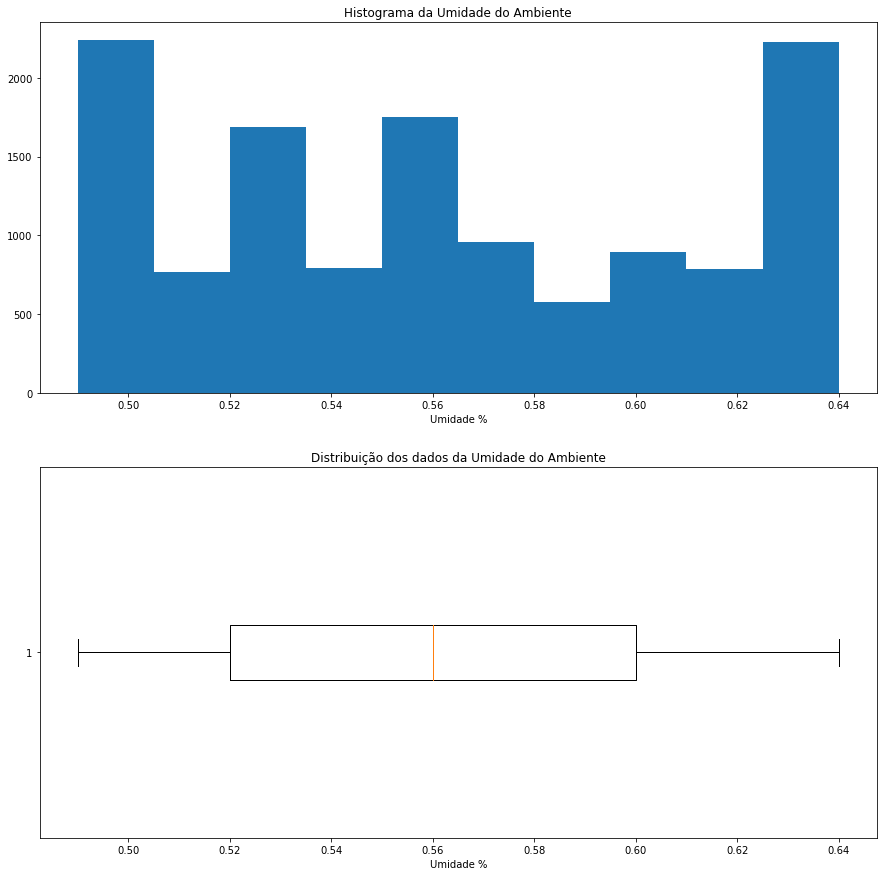

In [76]:
# Preparando os gráficos
grafico = plt.figure()
g1 = grafico.add_subplot(2,1,1)
g2 = grafico.add_subplot(2,1,2)

# Frequência dos Valores de Umidade do Ambiente de Torra
# Histograma da Umidade do Ambiente na Amostra
g1.hist(dataset_util['umid_amb'])
g1.set_title('Histograma da Umidade do Ambiente')
g1.set_xlabel('Umidade %')

# Distribuição Frequência da Umidade do Ambiente de Torra
# BoxPlot da Umidade do Ambiente na Amostra
g2.boxplot(dataset_util['umid_amb'], vert=False)
g2.set_title('Distribuição dos dados da Umidade do Ambiente')
g2.set_xlabel('Umidade %')

In [77]:
# Valores Centrais da Umidade do Ambiente da Amostra
print('Valores Centrais da Umidade do Ambiente da Amostra')
print("MODA = %.2f, MEDIANA = %.2f, MÉDIA = %.2f" 
      % (dataset_util['umid_amb'].mode()[0], 
         dataset_util['umid_amb'].median(), 
         dataset_util['umid_amb'].mean()))

Valores Centrais da Umidade do Ambiente da Amostra
MODA = 0.64, MEDIANA = 0.56, MÉDIA = 0.56


In [78]:
# Dispersão da Amostra
print('Desvio Padrão: %.2f' % dataset_util['umid_amb'].std())

Desvio Padrão: 0.05




---



In [79]:
# Corrigindo os Dados de Massa de Grãos
categorias = [0, 1999, 10000]
labels = ['Abaixo de 2000', 'Acima de 2000']
dataset_util['categoria_massa'] = pd.cut(dataset_util['massa_grao'], bins=categorias, labels=labels)
dataset_util

,batch,grao,temp_amb,umid_amb,peso,timex,temp2,charge_bt_modificado,massa_grao,categoria_massa
0,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",58.64558,215.230873,215.230873,2000,Acima de 2000
1,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",60.646011,213.678067,215.230873,2000,Acima de 2000
2,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",62.646332,199.982852,215.230873,2000,Acima de 2000
3,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",64.650602,185.970144,215.230873,2000,Acima de 2000
4,0,cafe_saulo_especial,30.7,0.61,"[2000.0, 1715.0, g]",66.646807,172.630521,215.230873,2000,Acima de 2000
...,...,...,...,...,...,...,...,...,...,...
12675,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",548.908025,196.340843,186.634894,600,Abaixo de 2000
12676,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",550.908707,196.536785,186.634894,600,Abaixo de 2000
12677,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",552.908391,196.763094,186.634894,600,Abaixo de 2000
12678,47,cafe_do_mario,28.0,0.58,"[600.0, 0.0, g]",554.908076,197.011429,186.634894,600,Abaixo de 2000


Text(0.5, 1.0, 'Percentual por Categoria de Massa de Grãos')

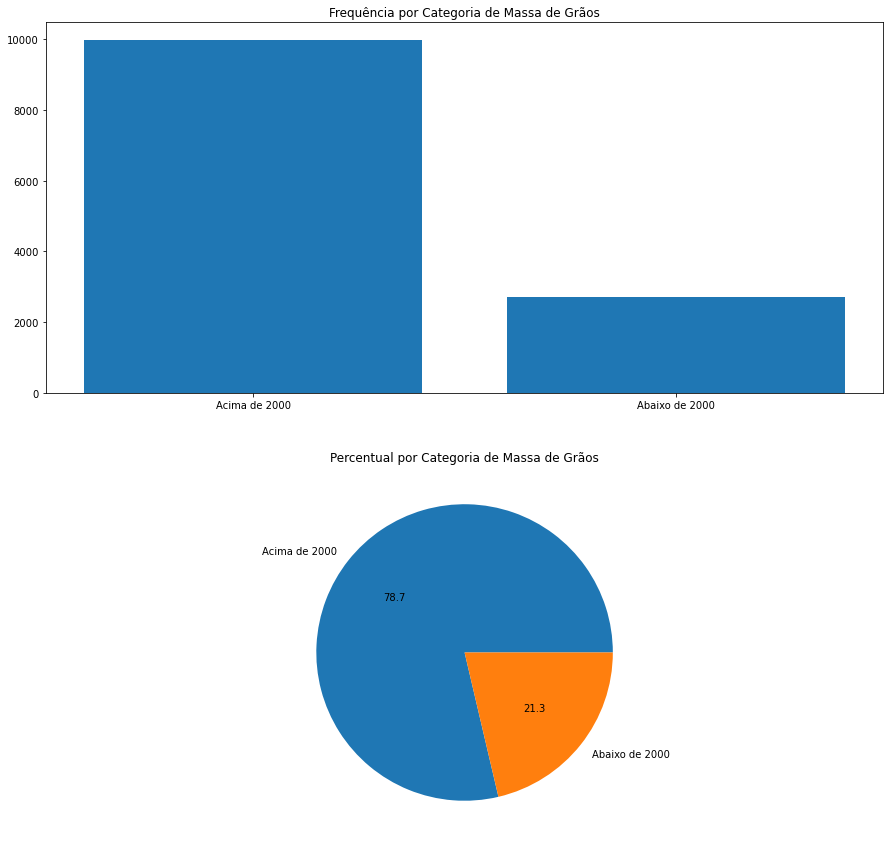

In [80]:
serie = dataset_util['categoria_massa'].value_counts()
# Visualizando a Frequência por categoria de Massa de Grãos
# Preparando os gráficos
grafico = plt.figure()
g1 = grafico.add_subplot(2,1,1)
g2 = grafico.add_subplot(2,1,2)

g1.bar(serie.index, serie)
g1.set_title("Frequência por Categoria de Massa de Grãos")

g2.pie(serie,labels=serie.index.values, autopct='%.1f',)
g2.set_title("Percentual por Categoria de Massa de Grãos")


In [81]:
# Valores Cruzados de Tipo de Grãos por Categoria de Massa
pd.crosstab(dataset_util['grao'], dataset_util['categoria_massa'], normalize=True)*100

categoria_massa,Abaixo de 2000,Acima de 2000
grao,,
cafe_do_mario,8.730284,13.864353
cafe_saulo_especial,6.238170,16.088328
cafe_saulo_gourmet,2.082019,22.910095
vo_mira_arabica,1.900631,11.514196
vo_mira_conilon,2.381703,14.290221


In [82]:

# Valores Cruzados de Temperatura de Carga por Categoria de Massa
# Aplicando a Regra de Sturges para definir um quantidade de categorias pela quantidade de valores
n = dataset_completo.shape[0]
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))

In [83]:
#Análise de frequência da Temperatura do Ambiente e Temperatura de Carga do Grão
s_temp_amb_cat = pd.cut(dataset_completo['temp_amb'], bins=k, include_lowest=True)
s_temp_car_cat = pd.cut(dataset_completo['charge_bt_modificado'], bins=k, include_lowest=True)
dic = {'Temperatura Ambiente': s_temp_amb_cat,
       'Temp. Carga do Grão': s_temp_car_cat}
df = pd.DataFrame(dic)
pd.crosstab(df['Temperatura Ambiente'], df['Temp. Carga do Grão'])

Temp. Carga do Grão,"(119.285, 134.407]","(179.454, 194.47]","(194.47, 209.485]","(209.485, 224.501]"
Temperatura Ambiente,,,,
"(25.993, 26.829]",0,0,1,8
"(26.829, 27.657]",0,0,0,1
"(27.657, 28.486]",0,3,0,0
"(28.486, 29.314]",0,0,0,3
"(29.314, 30.143]",0,0,2,9
"(30.143, 30.971]",1,1,0,10
"(30.971, 31.8]",0,1,1,7


## Salvando o Dataset

In [84]:
#Salvando os dados no Google Drive
dataset_util.to_csv('../datasets/dataset_cafe_estatistica.csv')